# SUBMIT

In [1]:
from __future__ import absolute_import, division, print_function

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from config import *
from common import *
display.clear_output()

## 1. Setup Environments

In [3]:
from affwild2_challenge.basic_emotion.losses1 import ccc, loss_ccc, ccc_numpy
from affwild2_challenge.basic_emotion.metrics import expr_score, f1_score, concordance_cc2

from affwild2_challenge.basic_emotion.dataset_affwild2 import AffWild2Dataset, emotiw_affwild2_mapping, affwild2_name, affwild2_emotiw_mapping, emotiw_name

In [4]:
params = {}
params["results_dir"]          = os.path.join(sub_dir, "results", "t24")
params["db_file"]              = os.path.join(dataset_dir, "AffWild2/data/affwild2_cropped_frames.h5")
params["db_root"]              = os.path.join(dataset_dir, "AffWild2/data/cropped")
params["scheme"]               = "emotion" # emotion, emotion_va

params["valid_view"]  = True   # view valid summary
params["valid_file"]  = "valid.npz"    # empty if not have

######################################################
params["submit_expr_enable"] = True
params["submit_expr_dir"]    = os.path.join(sub_dir, "submission")

params["submit_expr_type"]   = "test"                                        # valid, test, test_va
params["submit_expr_file"]   = "test.npz"                                    # empty if not have
params["submit_expr_name"]   = "Challenge_Track2_Expr_CNU_ADL_Submission03"  # empty if not have

# params["submit_expr_type"]   = "valid"                                             # valid, test, test_va
# params["submit_expr_file"]   = params["valid_file"]                                # empty if not have

# params["submit_expr_name"]   = "Challenge_Track2_Expr_CNU_ADL_Submission01_Valid"  # empty if not submit

######################################################
params["submit_va_enable"] = False  
params["submit_va_dir"]    = os.path.join(sub_dir, "submission")

params["submit_va_type"]   = "test_va"                                        # valid, test, test_va
params["submit_va_file"]   = "test_va.npz"                                    # empty if not have
# params["submit_va_name"]   = "Challenge_Track1_ValAro_CNU_ADL_Submission01"     # empty if not submit
params["submit_va_name"]   = ""     # empty if not submit

# params["submit_va_type"]   = "valid"                                              # valid, test, test_va
# params["submit_va_file"]   = params["valid_file"]                                 # empty if not have
# params["submit_va_name"]   = "Challenge_Track1_ValAro_CNU_ADL_Submission01_Valid" # empty if not submit

print("parameters: ")
for key in params.keys(): print("+ %s: %s"%(key,params[key]))

parameters: 
+ results_dir: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/results/t24
+ db_file: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/affwild2_cropped_frames.h5
+ db_root: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/cropped
+ scheme: emotion
+ valid_view: True
+ valid_file: valid.npz
+ submit_expr_enable: True
+ submit_expr_dir: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/submission
+ submit_expr_type: test
+ submit_expr_file: test.npz
+ submit_expr_name: Challenge_Track2_Expr_CNU_ADL_Submission03
+ submit_va_enable: False
+ submit_va_dir: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/submission
+ submit_va_type: test_va
+ submit_va_file: test_va.npz
+ submit_va_name: 


## 2. Setup Data

In [5]:
# Dataset Configuration
dataset_info  = dict(db_file = params["db_file"], db_root = params["db_root"])
print("dataset_info: ")
for key in dataset_info.keys(): print("+ %s: %s"%(key,dataset_info[key]))
    
ds = AffWild2Dataset(**dataset_info)
if params["scheme"] == "emotion_va":
    ds.load_scheme_emotion_va()
elif params["scheme"] == "emotion":
    ds.load_scheme_emotion()

dataset_info: 
+ db_file: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/affwild2_cropped_frames.h5
+ db_root: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/data/datasets/AffWild2/data/cropped
Loading Scheme Emotion: 
 + Loading train: 251
 + Loading valid: 69
 + Loading test: 223


## 3. Functions

In [6]:
def submit_expr(load_name, load_type, load_dir, save_dir, a_idx_data, ds, submit_name):
    load_path = os.path.join(load_dir, load_name)
    save_dir  = os.path.join(save_dir, submit_name)
    if os.path.exists(save_dir)==False: os.makedirs(save_dir)
    
    print("================================")
    print(f"Submit [{load_type}] - Expr")
    print(f"+ File: {load_path}")
    print(f"+ Nummber of items: {len(a_idx_data)}")
    print(f"+ Save folder: {save_dir}")
    print("================================")
    
    y_results   = dict(np.load(load_path, allow_pickle=True))
    df_info     = ds.df_frames.loc[a_idx_data]
    video_names = np.unique(df_info["video_name"])

    # Emotion
    y_pred_emotion_label = emotiw_affwild2_mapping[np.argmax(y_results["emotion"], axis = 1)]
    s_title_emotion      = "Neutral,Anger,Disgust,Fear,Happiness,Sadness,Surprise"
    print(f"Nummber of frames: {len(y_pred_emotion_label)}")

    for i_video in tqdm.tqdm(range(len(video_names)), desc="Process video"):
        video_name    = video_names[i_video]
        video_path    = os.path.join(save_dir, video_name + ".txt")
        filter_frames = df_info["video_name"]==video_name

        # Emotion
        video_emotion_pred = y_pred_emotion_label[filter_frames]

        with open(video_path, "wt") as file:
            file.writelines(f"{s_title_emotion}\n")
            for emotion in video_emotion_pred: file.writelines(f"{emotion}\n")
            pass
        # with
        pass
    # for
# submit_expr

def submit_va(load_name, load_type, load_dir, save_dir, a_idx_data, ds, submit_name):
    load_path = os.path.join(load_dir, load_name)
    save_dir  = os.path.join(save_dir, submit_name)
    if os.path.exists(save_dir)==False: os.makedirs(save_dir)
    
    print("================================")
    print(f"Submit [{load_type}] - Valence-Arousal")
    print(f"+ File: {load_path}")
    print(f"+ Nummber of items: {len(a_idx_data)}")
    print(f"+ Save folder: {save_dir}")
    print("================================")
    
    y_results   = dict(np.load(load_path, allow_pickle=True))
    df_info     = ds.df_frames.loc[a_idx_data]
    video_names = np.unique(df_info["video_name"])

    # Valence-Arousal
    aro_pred   = y_results["aro_ccc"].flatten()
    val_pred   = y_results["val_ccc"].flatten()
    s_title_va = "valence,arousal"
    print(f"Nummber of frames: {len(aro_pred)}")

    for i_video in tqdm.tqdm(range(len(video_names)), desc="Process video"):
        video_name    = video_names[i_video]
        video_path    = os.path.join(save_dir, video_name + ".txt")
        filter_frames = df_info["video_name"]==video_name

        # Valence-Arousal
        video_val_pred = val_pred[filter_frames]
        video_aro_pred = aro_pred[filter_frames]

        with open(video_path, "wt") as file:
            file.writelines(f"{s_title_va}\n")
            for val,aro in zip(video_val_pred, video_aro_pred): file.writelines(f"{val:.3f},{aro:.3f}\n")
            pass
        # with
        pass
    # for
# submit_va

# submit_expr(load_name   = params["valid_file"],
#             load_type   = "valid",
#             load_dir    = params["results_dir"],
#             a_idx_data  = ds.a_idx_valid,
#             ds          = ds,
#             submit_name = "Challenge_Track2_Expr_CNU_ADL_Submission01_Valid")

# submit_va(load_name     = params["valid_file"],
#             load_type   = "valid",
#             load_dir    = params["results_dir"],
#             a_idx_data  = ds.a_idx_valid,
#             ds          = ds,
#             submit_name = "Challenge_Track1_ValAro_CNU_ADL_Submission01_Valid")

In [7]:
def view_summary(load_name, load_type, load_dir, scheme_name, a_idx_data, ds):
    load_path = os.path.join(load_dir, load_name)
    
    print("================================")
    print(f"Summary [{load_type}]")
    print(f"+ File: {load_path}")
    print(f"+ Scheme: {scheme_name}")
    print(f"+ Nummber of items: {len(a_idx_data)}")
    print("================================")

    
    y_results            = dict(np.load(load_path, allow_pickle=True))
    y_pred_emotion_label = emotiw_affwild2_mapping[np.argmax(y_results["emotion"], axis = 1)]
    y_true_emotion_label = ds.df_frames.loc[a_idx_data]["expr_emotion"].values

    print(f"Nummber of frames: {len(y_pred_emotion_label)}")

    a_summary_report = model_report(y_true_emotion_label, y_pred_emotion_label, affwild2_name)
    s_summary_report = buffer_print_string(print_summary, a_summary_report)
    print(s_summary_report)

    f1   = a_summary_report["model_f1_avg_weighted"]
    acc  = a_summary_report["model_acc_all"]
    expr = f1 * 0.66 + acc * 0.33
    print(f"f1: {f1}")
    print(f"acc: {acc}")
    print(f"expr: {expr}")

    plt.figure(figsize=(6,6))
    plot_confusion_matrix(y_true_emotion_label, y_pred_emotion_label, 
                          title='Average accuracy \n ( Accuracy={acc:.2f} )\n',
                          classes = affwild2_name)

    if scheme_name=="emotion_va":
        aro_pred = y_results["aro_ccc"].flatten()
        val_pred = y_results["val_ccc"].flatten()
        aro_true = ds.df_frames.loc[a_idx_data]["va_arousal"].values
        val_true = ds.df_frames.loc[a_idx_data]["va_valence"].values

        aro_ccc1 = concordance_cc2(aro_true, aro_pred)
        aro_ccc2 = ccc_numpy(aro_true, aro_pred)
        val_ccc1 = concordance_cc2(val_true, val_pred)
        val_ccc2 = ccc_numpy(val_true, val_pred)

        avg_ccc1 = (aro_ccc1 + val_ccc1) / 2.0
        avg_ccc2 = (aro_ccc2 + val_ccc2) / 2.0

        print(f"aro: {aro_ccc1}, {aro_ccc2}")
        print(f"val: {val_ccc1}, {val_ccc2}")
        print(f"valaro_avg: {avg_ccc1}, {avg_ccc2}")
    # if
# view_summary

# view_summary(load_name = params["valid_file"], 
#              load_type = "valid", 
#              load_dir  = params["results_dir"], 
#              a_idx_data= ds.a_idx_valid, 
#              ds        = ds)

## 4. View summary

Summary [valid]
+ File: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/results/t24/valid.npz
+ Scheme: emotion
+ Nummber of items: 319348
Nummber of frames: 319348
Classification Report: 
               precision    recall  f1-score   support

     Neutral       0.80      0.51      0.62    182030
       Angry       0.11      0.22      0.15      7936
     Disgust       0.07      0.07      0.07      5807
        Fear       0.07      0.07      0.07      9734
       Happy       0.37      0.78      0.50     52508
         Sad       0.44      0.47      0.45     38270
    Surprise       0.42      0.41      0.42     23063

    accuracy                           0.51    319348
   macro avg       0.33      0.36      0.33    319348
weighted avg       0.61      0.51      0.53    319348

Confustion Matrix Int: 
 [[93071 10456  2119  6295 52895  8760  8434]
 [ 1322  1709    75    23  2079  2564   164]
 [  397   146   402     3   755  3918   186]
 [ 2817   573   458   672   630  3287  1

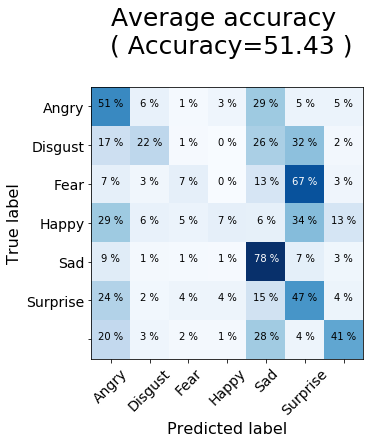

In [8]:
if params["valid_file"] != "" and params["valid_view"] == True:
    view_summary(load_name   = params["valid_file"], 
                 load_type   = "valid", 
                 load_dir    = params["results_dir"], 
                 scheme_name = params["scheme"], 
                 a_idx_data  = ds.a_idx_valid, 
                 ds          = ds)
# if

## 4. Submit

In [9]:
if params["submit_expr_enable"] == True and params["submit_expr_file"] != "" and params["submit_expr_name"]!= "" and params["submit_expr_type"]!="":
    if params["submit_expr_type"] == "valid":
        a_idx_submit_expr = ds.a_idx_valid
    elif params["submit_expr_type"] == "test":
        a_idx_submit_expr = ds.a_idx_test
    elif params["submit_expr_type"] == "test_va":
        a_idx_submit_expr = ds.a_idx_va_test
    
    submit_expr(load_name   = params["submit_expr_file"],
                load_type   = params["submit_expr_type"],
                load_dir    = params["results_dir"],
                save_dir    = params["submit_expr_dir"],
                a_idx_data  = a_idx_submit_expr,
                ds          = ds,
                submit_name = params["submit_expr_name"])
# if

Submit [test] - Expr
+ File: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/results/t24/test.npz
+ Nummber of items: 997326
+ Save folder: /home/pc/Documents/dntai/projects/Emotion/AffWild2Prj/submit/submission/Challenge_Track2_Expr_CNU_ADL_Submission03


Process video:   1%|▏         | 3/223 [00:00<00:08, 27.46it/s]

Nummber of frames: 997326


Process video: 100%|██████████| 223/223 [00:08<00:00, 27.30it/s]


In [10]:
if params["submit_va_enable"] == True and params["submit_va_file"] != "" and params["submit_va_name"]!= "" and params["submit_va_type"]!="":
    if params["submit_va_type"] == "valid":
        a_idx_submit_va = ds.a_idx_valid
    elif params["submit_va_type"] == "test":
        a_idx_submit_va = ds.a_idx_test
    elif params["submit_va_type"] == "test_va":
        a_idx_submit_va = ds.a_idx_va_test
    
    submit_va(load_name   = params["submit_va_file"],
                load_type   = params["submit_va_type"],
                load_dir    = params["results_dir"],
                save_dir    = params["submit_va_dir"],
                a_idx_data  = a_idx_submit_va,
                ds          = ds,
                submit_name = params["submit_va_name"])
# if

# END PROJECT